<a href="https://colab.research.google.com/github/varshagayke/ML_algorithms/blob/main/MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

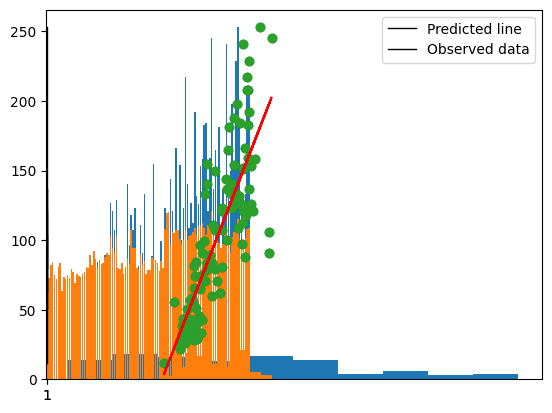

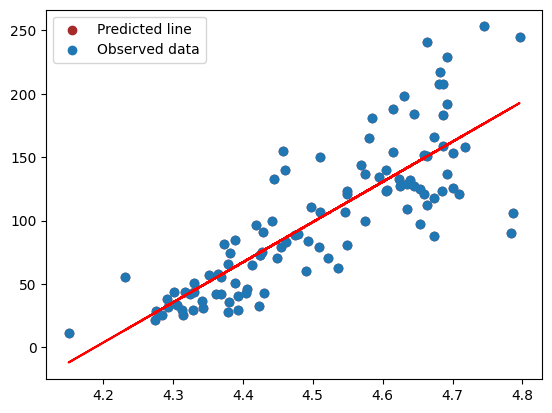

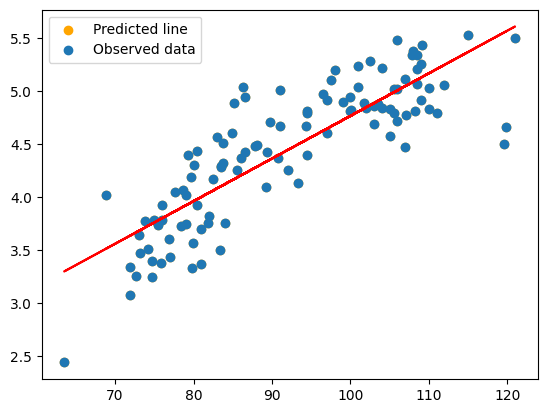

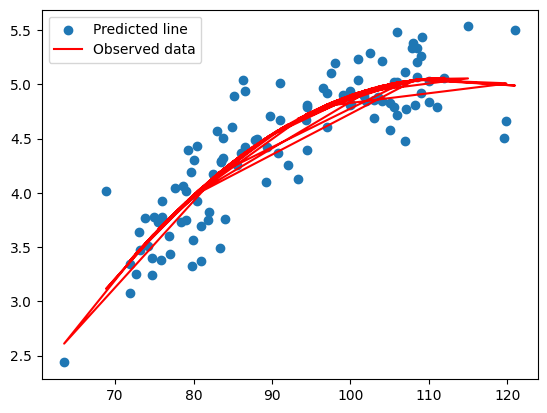

np.float64(29.582324865202025)

In [2]:
# Importing necessary libraries
import pandas as pd # deals with data frame
import numpy as np  # deals with numerical values

wcat = pd.read_csv("/content/wc-at.csv")

# Exploratory data analysis:
# 1. Measures of central tendency
# 2. Measures of dispersion
# 3. Third moment business decision
# 4. Fourth moment business decision
# 5. Probability distributions of variables
# 6. Graphical representations (Histogram, Box plot, Dot plot, Stem & Leaf plot, Bar plot, etc.)

wcat.describe()

#Graphical Representation
import matplotlib.pyplot as plt # mostly used for visualization purposes

plt.bar(height = wcat.AT, x = np.arange(1, 110, 1))
plt.hist(wcat.AT) #histogram
plt.boxplot(wcat.AT) #boxplot

plt.bar(height = wcat.Waist, x = np.arange(1, 110, 1))
plt.hist(wcat.Waist) #histogram
plt.boxplot(wcat.Waist) #boxplot

# Scatter plot
plt.scatter(x = wcat['Waist'], y = wcat['AT'], color = 'green')

# correlation
np.corrcoef(wcat.Waist, wcat.AT)

# Covariance
# NumPy does not have a function to calculate the covariance between two variables directly.
# Function for calculating a covariance matrix called cov()
# By default, the cov() function will calculate the unbiased or sample covariance between the provided random variables.

cov_output = np.cov(wcat.Waist, wcat.AT)[0, 1]
cov_output

# wcat.cov()


# Import library
import statsmodels.formula.api as smf

# Simple Linear Regression
model = smf.ols('AT ~ Waist', data = wcat).fit()
model.summary()

pred1 = model.predict(pd.DataFrame(wcat['Waist']))

# Regression Line
plt.scatter(wcat.Waist, wcat.AT)
plt.plot(wcat.Waist, pred1, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

# Error calculation
res1 = wcat.AT - pred1
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

######### Model building on Transformed Data
# Log Transformation
# x = log(waist); y = at

plt.scatter(x = np.log(wcat['Waist']), y = wcat['AT'], color = 'brown')
np.corrcoef(np.log(wcat.Waist), wcat.AT) #correlation

model2 = smf.ols('AT ~ np.log(Waist)', data = wcat).fit()
model2.summary()

pred2 = model2.predict(pd.DataFrame(wcat['Waist']))

# Regression Line
plt.scatter(np.log(wcat.Waist), wcat.AT)
plt.plot(np.log(wcat.Waist), pred2, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

# Error calculation
res2 = wcat.AT - pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2


#### Exponential transformation
# x = waist; y = log(at)

plt.scatter(x = wcat['Waist'], y = np.log(wcat['AT']), color = 'orange')
np.corrcoef(wcat.Waist, np.log(wcat.AT)) #correlation

model3 = smf.ols('np.log(AT) ~ Waist', data = wcat).fit()
model3.summary()

pred3 = model3.predict(pd.DataFrame(wcat['Waist']))
pred3_at = np.exp(pred3)
pred3_at

# Regression Line
plt.scatter(wcat.Waist, np.log(wcat.AT))
plt.plot(wcat.Waist, pred3, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

# Error calculation
res3 = wcat.AT - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3


#### Polynomial transformation
# x = waist; x^2 = waist*waist; y = log(at)

model4 = smf.ols('np.log(AT) ~ Waist + I(Waist*Waist)', data = wcat).fit()
model4.summary()

pred4 = model4.predict(pd.DataFrame(wcat))
pred4_at = np.exp(pred4)
pred4_at

# Regression line
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X = wcat.iloc[:, 0:1].values
X_poly = poly_reg.fit_transform(X)
# y = wcat.iloc[:, 1].values


plt.scatter(wcat.Waist, np.log(wcat.AT))
plt.plot(X, pred4, color = 'red')
plt.legend(['Predicted line', 'Observed data'])
plt.show()


# Error calculation
res4 = wcat.AT - pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4


# Choose the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse

###################
# The best model

from sklearn.model_selection import train_test_split

train, test = train_test_split(wcat, test_size = 0.2)

finalmodel = smf.ols('np.log(AT) ~ Waist + I(Waist*Waist)', data = train).fit()
finalmodel.summary()

# Predict on test data
test_pred = finalmodel.predict(pd.DataFrame(test))
pred_test_AT = np.exp(test_pred)
pred_test_AT

# Model Evaluation on Test data
test_res = test.AT - pred_test_AT
test_sqrs = test_res * test_res
test_mse = np.mean(test_sqrs)
test_rmse = np.sqrt(test_mse)
test_rmse


# Prediction on train data
train_pred = finalmodel.predict(pd.DataFrame(train))
pred_train_AT = np.exp(train_pred)
pred_train_AT

# Model Evaluation on train data
train_res = train.AT - pred_train_AT
train_sqrs = train_res * train_res
train_mse = np.mean(train_sqrs)
train_rmse = np.sqrt(train_mse)
train_rmse
